In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_set_path = r'C:\Users\OJH\OneDrive\SKKU\연구자료\Catalyst AI\New Database\Na_W_Mn_train.csv'
train_set = pd.read_csv(train_set_path)

train_set.drop(['Unnamed: 0'], axis=1, inplace=True)

test_set_path = r'C:\Users\OJH\OneDrive\SKKU\연구자료\Catalyst AI\New Database\Na_W_Mn_test.csv'
test_set = pd.read_csv(test_set_path)

test_set.drop(['Unnamed: 0'], axis=1, inplace=True)

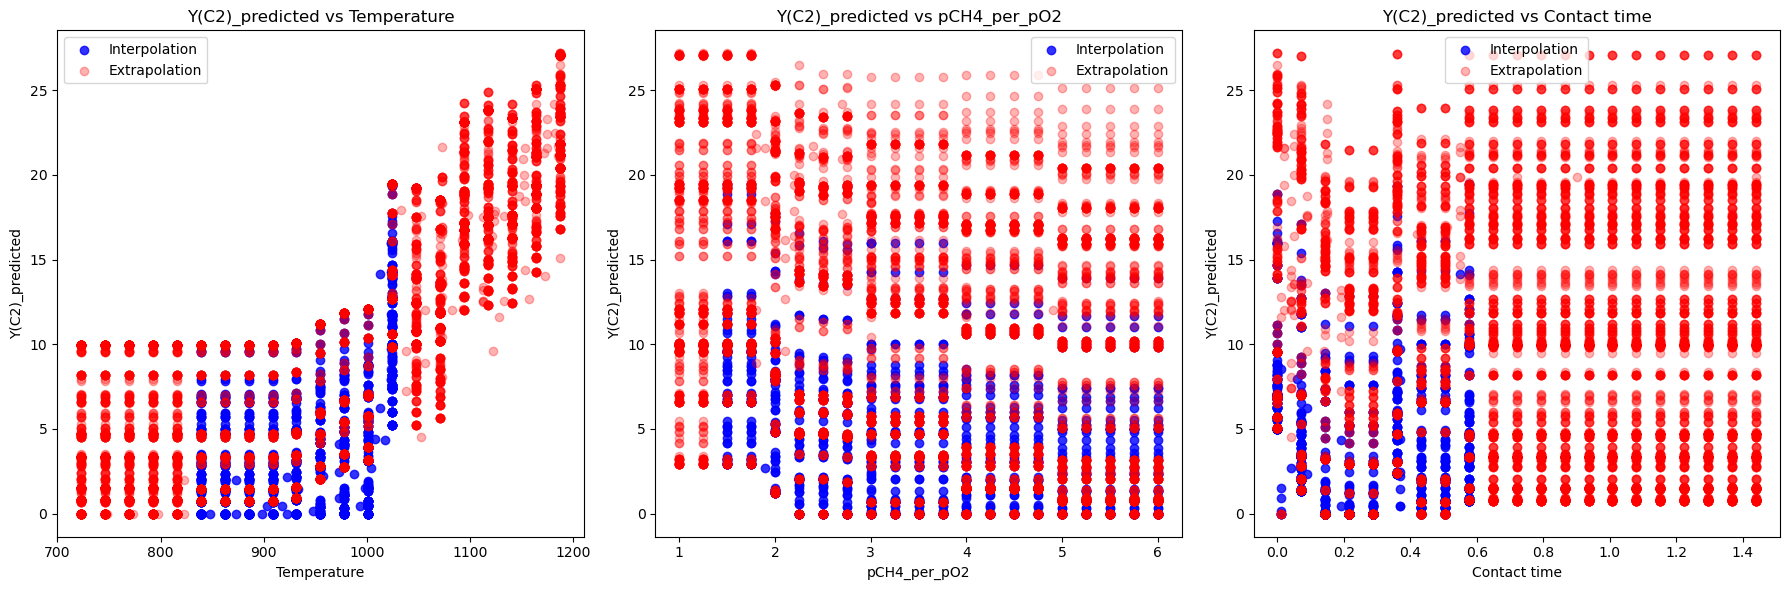

In [2]:
# Function to plot 2D scatter
def plot_2d_scatter(ax, df, x_col, y_col, label, color, alpha):
    ax.scatter(df[x_col], df[y_col], color=color, label=label, alpha=alpha)

# Create 2D scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Y(C2)_predicted vs Temperature
plot_2d_scatter(axes[0], train_set, 'Temperature', 'Y(C2)_predicted', 'Interpolation', 'blue', 0.8)
plot_2d_scatter(axes[0], test_set, 'Temperature', 'Y(C2)_predicted', 'Extrapolation', 'red', 0.3)
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Y(C2)_predicted')
axes[0].set_title('Y(C2)_predicted vs Temperature')

# Plot 2: Y(C2)_predicted vs pCH4_per_pO2
plot_2d_scatter(axes[1], train_set, 'pCH4_per_pO2', 'Y(C2)_predicted', 'Interpolation', 'blue', 0.8)
plot_2d_scatter(axes[1], test_set, 'pCH4_per_pO2', 'Y(C2)_predicted', 'Extrapolation', 'red', 0.3)
axes[1].set_xlabel('pCH4_per_pO2')
axes[1].set_ylabel('Y(C2)_predicted')
axes[1].set_title('Y(C2)_predicted vs pCH4_per_pO2')

# Plot 3: Y(C2)_predicted vs Contact time
plot_2d_scatter(axes[2], train_set, 'Contact time', 'Y(C2)_predicted', 'Interpolation', 'blue', 0.8)
plot_2d_scatter(axes[2], test_set, 'Contact time', 'Y(C2)_predicted', 'Extrapolation', 'red', 0.3)
axes[2].set_xlabel('Contact time')
axes[2].set_ylabel('Y(C2)_predicted')
axes[2].set_title('Y(C2)_predicted vs Contact time')

# Adding legends and displaying the plots
for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()

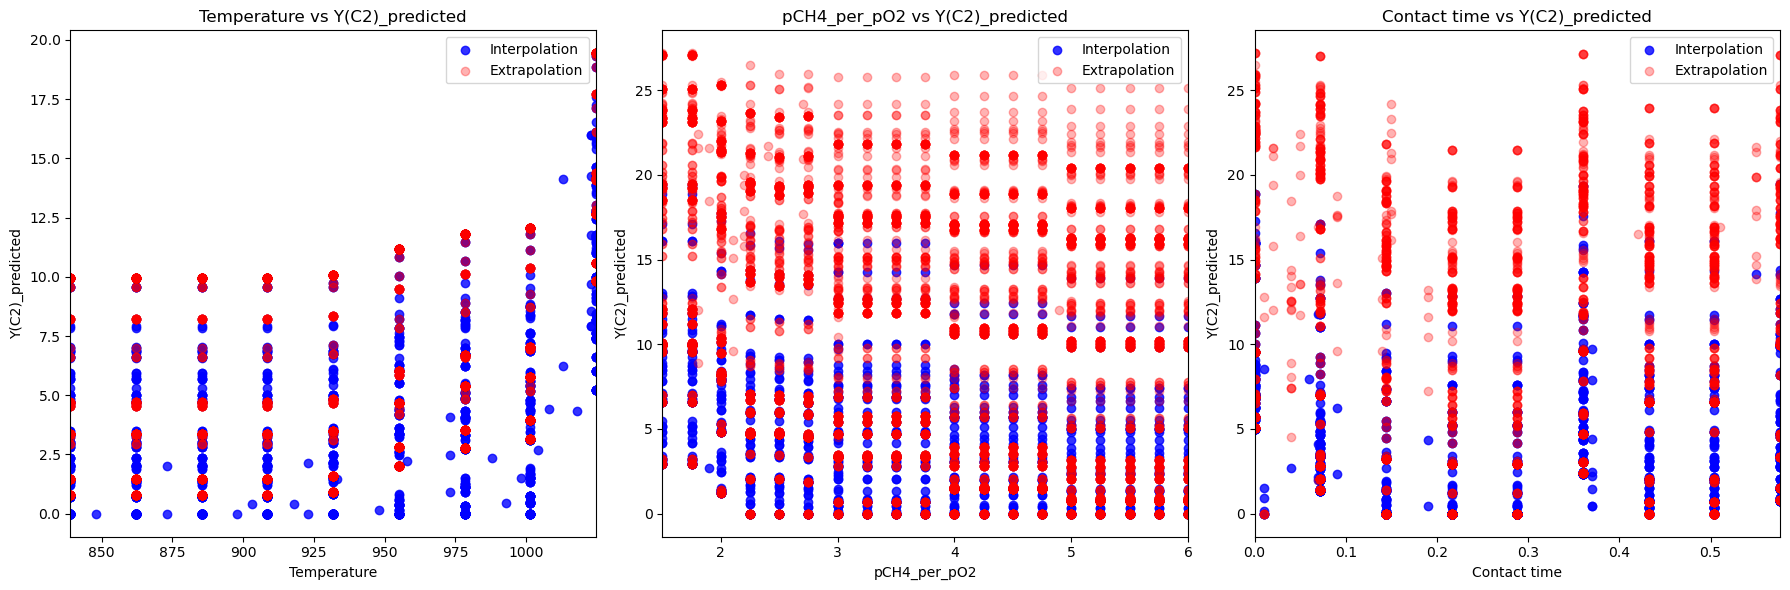

In [3]:
import matplotlib.pyplot as plt

# Function to plot 2D scatter with specified axis ranges
def plot_2d_scatter_with_range(ax, df, x_col, y_col, label, color, alpha, x_range):
    # Filter the dataframe based on the x_range
    filtered_df = df[(df[x_col] >= x_range[0]) & (df[x_col] <= x_range[1])]
    ax.scatter(filtered_df[x_col], filtered_df[y_col], color=color, label=label, alpha=alpha)

# Define the ranges for each variable
temperature_range = (train_set['Temperature'].min(), train_set['Temperature'].max())
pCH4_per_pO2_range = (train_set['pCH4_per_pO2'].min(), train_set['pCH4_per_pO2'].max())
contact_time_range = (train_set['Contact time'].min(), train_set['Contact time'].max())
y_predicted_range = (train_set['Y(C2)_predicted'].min(), train_set['Y(C2)_predicted'].max())

# Function to plot 2D scatter with specified axis ranges
def plot_2d_scatter_with_range(ax, df, x_col, y_col, label, color, alpha, x_range):
    filtered_df = df[(df[x_col] >= x_range[0]) & (df[x_col] <= x_range[1])]
    ax.scatter(filtered_df[x_col], filtered_df[y_col], color=color, label=label, alpha=alpha)

# Create 2D scatter plots with specified ranges
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Temperature vs Y(C2)_predicted
plot_2d_scatter_with_range(axes[0], train_set, 'Temperature', 'Y(C2)_predicted', 'Interpolation', 'blue', 0.8, temperature_range)
plot_2d_scatter_with_range(axes[0], test_set, 'Temperature', 'Y(C2)_predicted', 'Extrapolation', 'red', 0.3, temperature_range)
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Y(C2)_predicted')
axes[0].set_xlim(temperature_range)
axes[0].set_title('Temperature vs Y(C2)_predicted')

# Plot 2: pCH4_per_pO2 vs Y(C2)_predicted
plot_2d_scatter_with_range(axes[1], train_set, 'pCH4_per_pO2', 'Y(C2)_predicted', 'Interpolation', 'blue', 0.8, pCH4_per_pO2_range)
plot_2d_scatter_with_range(axes[1], test_set, 'pCH4_per_pO2', 'Y(C2)_predicted', 'Extrapolation', 'red', 0.3, pCH4_per_pO2_range)
axes[1].set_xlabel('pCH4_per_pO2')
axes[1].set_ylabel('Y(C2)_predicted')
axes[1].set_xlim(pCH4_per_pO2_range)
axes[1].set_title('pCH4_per_pO2 vs Y(C2)_predicted')

# Plot 3: Contact time vs Y(C2)_predicted
plot_2d_scatter_with_range(axes[2], train_set, 'Contact time', 'Y(C2)_predicted', 'Interpolation', 'blue', 0.8, contact_time_range)
plot_2d_scatter_with_range(axes[2], test_set, 'Contact time', 'Y(C2)_predicted', 'Extrapolation', 'red', 0.3, contact_time_range)
axes[2].set_xlabel('Contact time')
axes[2].set_ylabel('Y(C2)_predicted')
axes[2].set_xlim(contact_time_range)
axes[2].set_title('Contact time vs Y(C2)_predicted')

for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()

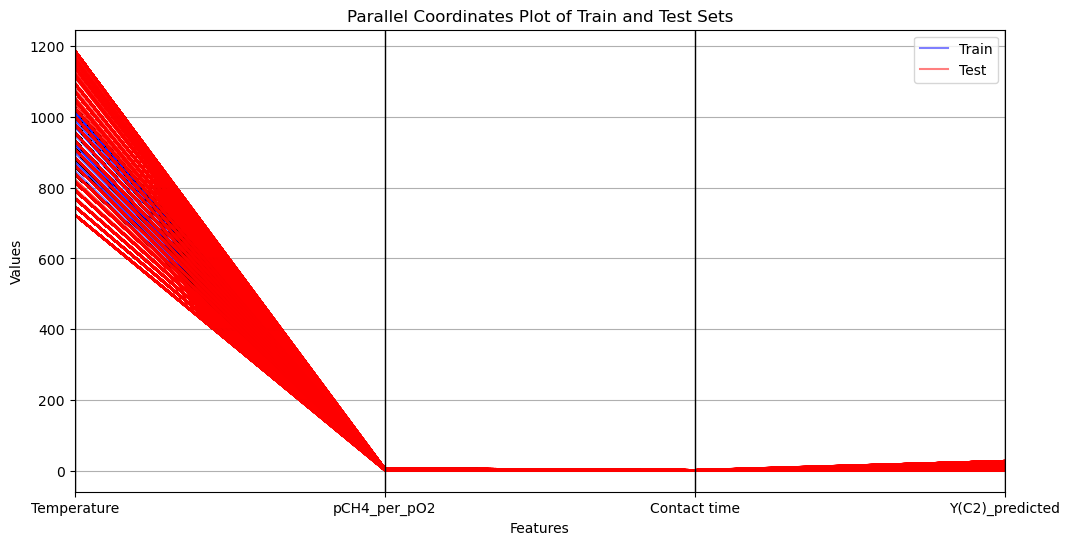

In [9]:
from pandas.plotting import parallel_coordinates

# To plot parallel coordinates, we need to label each row of our datasets
train_set['DataSet'] = 'Train'
test_set['DataSet'] = 'Test'

# Combining the datasets for plotting
combined_data = pd.concat([train_set, test_set])

# Creating the parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(combined_data, 'DataSet', color=['blue', 'red'], alpha=0.5)
plt.title('Parallel Coordinates Plot of Train and Test Sets')
plt.ylabel('Values')
plt.xlabel('Features')
plt.show()

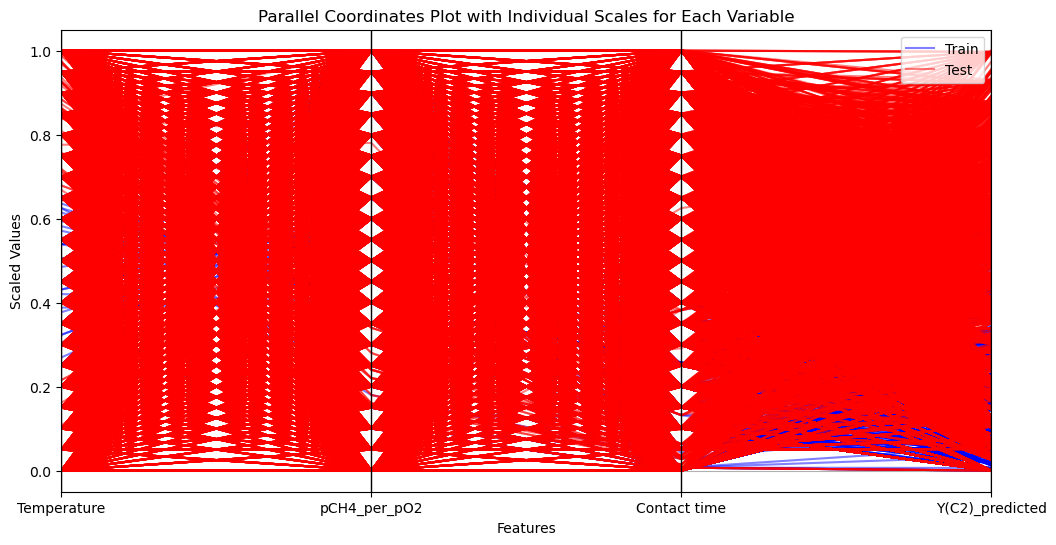

In [11]:
def scale_to_common_range(data, columns):
    """
    Scales each column in 'columns' of the dataframe 'data' to a common range [0, 1].
    This is done individually for each column to maintain their separate scales.
    """
    scaled_data = data.copy()
    for col in columns:
        min_val = data[col].min()
        max_val = data[col].max()
        scaled_data[col] = (data[col] - min_val) / (max_val - min_val)
    return scaled_data

# Columns to be scaled
columns_to_scale = ['Temperature', 'pCH4_per_pO2', 'Contact time', 'Y(C2)_predicted']

# Scaling the data
scaled_combined_data = scale_to_common_range(combined_data, columns_to_scale)

# Creating the parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(scaled_combined_data, 'DataSet', color=['blue', 'red'], alpha=0.5)
plt.title('Parallel Coordinates Plot with Individual Scales for Each Variable')
plt.ylabel('Scaled Values')
plt.xlabel('Features')
plt.show()

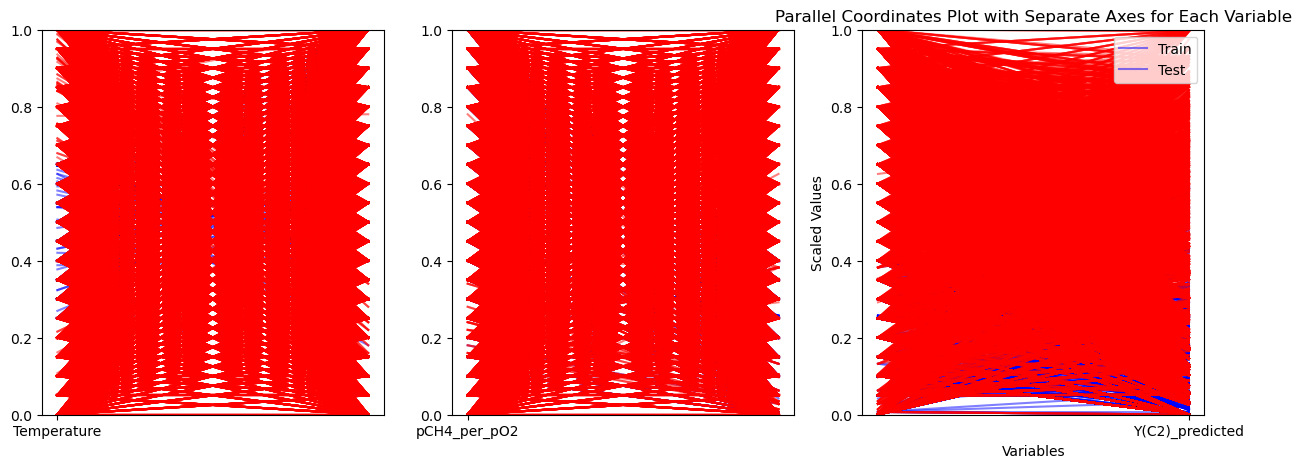

In [15]:
import matplotlib.ticker as ticker

def create_parallel_coordinates(data, columns, class_column):
    # Number of variables (axes) to plot
    num_vars = len(columns)

    # Create figure and axes
    fig, axes = plt.subplots(1, num_vars - 1, figsize=(15, 5), sharey=False)

    # Normalize data for each variable to [0, 1] range
    min_max_range = {}
    for col in columns:
        min_val = data[col].min()
        max_val = data[col].max()
        min_max_range[col] = (min_val, max_val)
        data[col] = (data[col] - min_val) / (max_val - min_val)

    # Create the parallel coordinates plot
    for i, ax in enumerate(axes):
        for idx, row in data.iterrows():
            # Create a line for each data point
            y = [row[columns[i]], row[columns[i + 1]]]
            color = 'blue' if row[class_column] == 'Train' else 'red'
            ax.plot([i, i + 1], y, color=color, alpha=0.5)

        # Set the limits for each axis
        ax.set_ylim([0, 1])

        # Set the tick labels for each axis
        ax.xaxis.set_major_locator(ticker.FixedLocator([i]))
        ax.xaxis.set_major_formatter(ticker.FixedFormatter([columns[i]]))

    # Set the tick labels for the last axis
    plt.xticks([num_vars - 1], [columns[-1]])

    # Set plot title and labels
    plt.title('Parallel Coordinates Plot with Separate Axes for Each Variable')
    plt.xlabel('Variables')
    plt.ylabel('Scaled Values')

    # Add legend
    plt.legend(['Train', 'Test'], loc='upper right')

    plt.show()

# Creating the plot
create_parallel_coordinates(combined_data, columns_to_plot, 'DataSet')

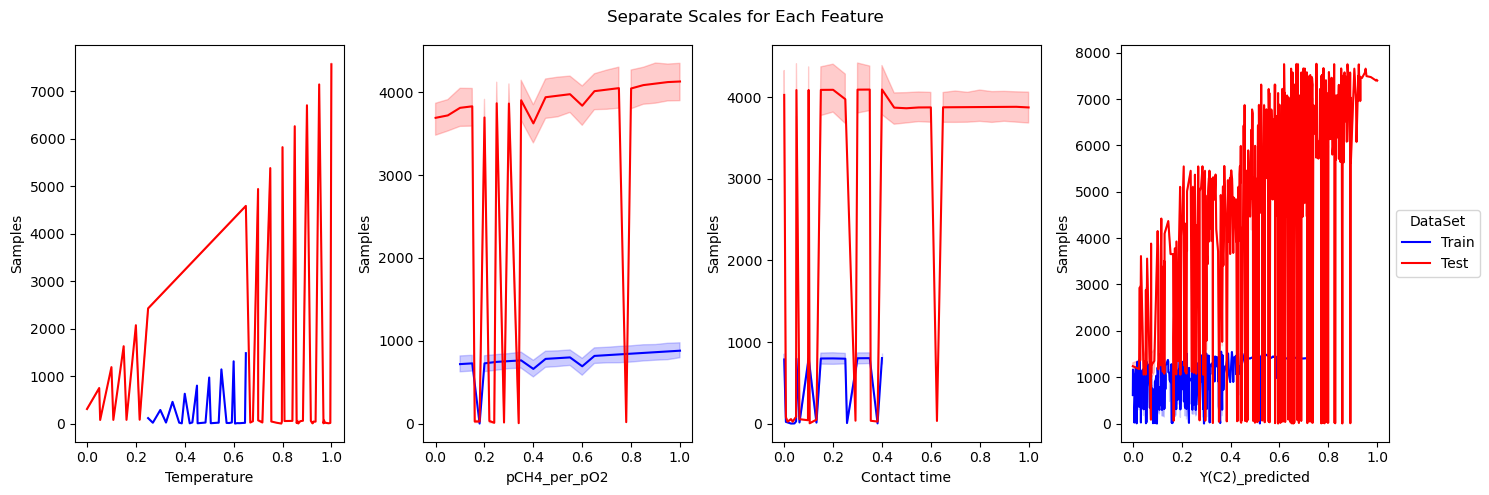

In [16]:
import matplotlib.gridspec as gridspec

# Number of features
num_features = len(columns_to_scale)

# Creating a grid for subplots
plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, num_features)

# Creating a subplot for each feature
for i, feature in enumerate(columns_to_scale):
    ax = plt.subplot(gs[0, i])
    sns.lineplot(data=combined_data, x=feature, y=combined_data.index, hue='DataSet', palette=['blue', 'red'])
    ax.set_ylabel('Samples')
    ax.set_xlabel(feature)
    ax.legend().set_visible(False)

# Adding a legend outside of the last subplot
plt.subplot(gs[0, num_features - 1]).legend(loc='center left', bbox_to_anchor=(1, 0.5), title='DataSet')
plt.suptitle('Separate Scales for Each Feature')
plt.tight_layout()
plt.show()

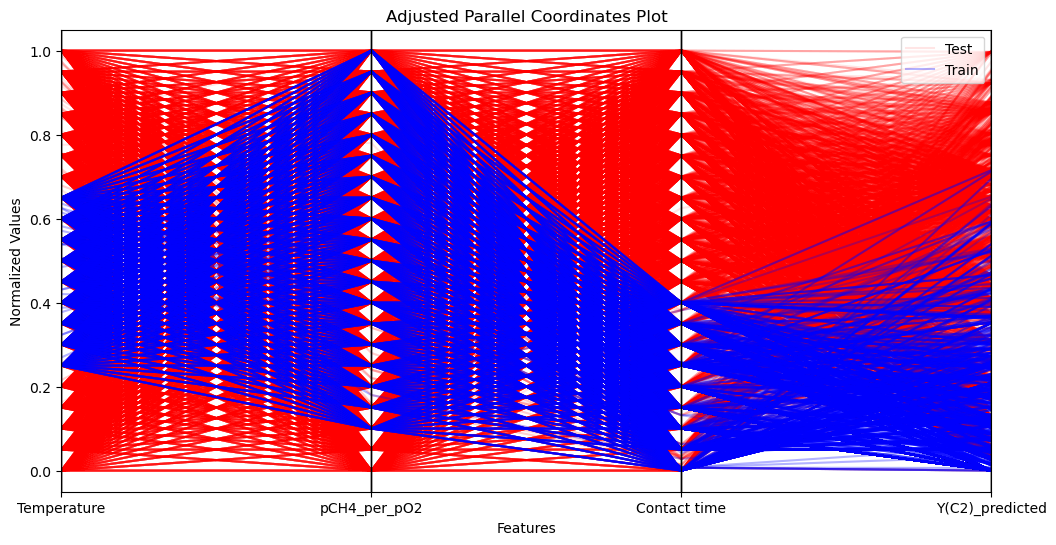

In [17]:
plt.figure(figsize=(12, 6))
# Plotting test set first so it's in the background
parallel_coordinates(combined_data[combined_data['DataSet'] == 'Test'], 'DataSet', color='red', alpha=0.1)
# Plotting train set on top
parallel_coordinates(combined_data[combined_data['DataSet'] == 'Train'], 'DataSet', color='blue', alpha=0.3)
plt.title('Adjusted Parallel Coordinates Plot')
plt.ylabel('Normalized Values')
plt.xlabel('Features')
plt.show()